## Imports

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Load & Split Dataset

In [2]:
iris = datasets.load_iris()
print("Iris Data\n",list(iris.keys()))
X = iris.data[:, :2] # we only take the first two features.
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0
print(y)
# Split into a train and test partition.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=0)

Iris Data
 ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


<br>
<br>

## Exercise 1. - Logistic Regression with Sci-kit Learn

In [3]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

train_predict = log_reg.predict(X_train[:len(y_train), :])
test_predict = log_reg.predict(X_test[:len(y_test), :])
print("Predict (train):", train_predict)
print("Predict (test):", test_predict)

Predict (train): [1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0
 0 1 0 0 0 1 0 1 0]
Predict (test): [0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Accuracy using SKLearn

In [4]:
print("Actual (train):",y_train)
print("Actual (test):",y_test)

# Using SKLearn
print("Train Accuracy:",accuracy_score(y_train, train_predict))
print("Test Accuracy:",accuracy_score(y_test, test_predict))

Actual (train): [1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 0]
Actual (test): [1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
Train Accuracy: 0.8333333333333334
Test Accuracy: 0.7


### Accuracy without using SKLearn

In [5]:
def accuracy(real, prediction):
    #Accuracy = (TP+TN) / (TP+TN+FP+FN) ; Alternatively: #Equal values / #Size of arrays
    return np.sum(real == prediction) / len(real)

In [6]:
print("Actual (train):",y_train)
print("Actual (test):",y_test)

# Without using SKLearn
print("Train Accuracy:", accuracy(y_train, train_predict))
print("Test Accuracy:", accuracy(y_test, test_predict))

Actual (train): [1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 0]
Actual (test): [1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
Train Accuracy: 0.8333333333333334
Test Accuracy: 0.7


<br>
<br>

## Exercise 2. - Perceptron with Numpy

### a) Implementing the update rules for Squared Errors and Cross-Entropy with Linear and Sigmoid activation functions

In [7]:
# Activation Functions
def linear_activation(x, w):
    predict = w.T @ x
    return predict
    #return 1.0 if predict >= 0.0 else 0.0

def sigmoid_activation(x, w):
    z = linear_activation(x,w)
    return sigmoid(z)
    #return 1.0 if predict >= 0.0 else 0.0
    
def sigmoid(z):
    predict = np.exp(z) / (1 + np.exp(z))
    return predict

#i
def lr_se_linear(x, y, w, niu, max_epochs = 1000):
    num_epochs = 0
    errors = []

    while(True):
        if(num_epochs >= max_epochs): break
            
        num_epochs += 1
        changed = False
        err_cum = 0
        
        for i in range(len(x)):
            dp = np.insert(x[i], 0, 1, axis=0) # Data Point (add bias)
            
            # 1. Compute output - activation function
            o = linear_activation(dp, w)

            # 2. Compute error: niu (y - o) * x
            delta = (y[i] - o)
            err_cum += abs(delta)
            
            if(abs(delta) < 1e-5): continue

            # 3. Update weights
            w = w + np.reshape((niu * delta * dp), w.shape)
            
            #print("   w: ",w)
            
            changed = True
            
        errors.append(err_cum)
        
        if(not changed): break
            
    return (w, num_epochs, errors)

#ii
def lr_se_sigmoid(x, y, w, niu, max_epochs = 1000):
    num_epochs = 0
    errors = []

    while(True):
        if(num_epochs >= max_epochs): break
            
        num_epochs += 1
        changed = False
        err_cum = 0
        
        for i in range(len(x)):
            dp = np.insert(x[i], 0, 1, axis=0) # Data Point (add bias)
            
            # 1. Compute output - activation function
            o = sigmoid_activation(dp, w)
            
            # 2. Compute error (LEC6 - Slides 34)
            net = linear_activation(dp, w)
            delta = (y[i] - o) * sigmoid(net) * (1 - sigmoid(net))
            err_cum += abs(delta)
            
            if(abs(delta) < 1e-5): continue

            # 3. Update weights
            w = w + np.reshape((niu * delta * dp), w.shape)
                        
            changed = True
            
        errors.append(err_cum)
        
        if(not changed): break
            
    return (w, num_epochs, errors)

#iii
def lr_ce_sigmoid(x, y, w, niu, max_epochs = 1000):
    num_epochs = 0
    errors = []

    while(True):
        if(num_epochs >= max_epochs): break
            
        num_epochs += 1
        changed = False
        err_cum = 0
        
        for i in range(len(x)):
            dp = np.insert(x[i], 0, 1, axis=0) # Data Point (add bias)
            
            # 1. Compute output - activation function
            o = sigmoid_activation(dp, w)

            # 2. Compute error: niu (y - o) * x
            delta = (y[i] - o)
            err_cum += abs(delta)
            
            if(abs(delta) < 1e-5): continue

            # 3. Update weights
            w = w + np.reshape((niu * delta * dp), w.shape)
            
            #print("   w: ",w)
            
            changed = True
            
        errors.append(err_cum)
        
        if(not changed): break
            
    return (w, num_epochs, errors)

[[-1.78470115]
 [ 0.38405476]
 [-0.02796238]]
1000
[[-2.44991643]
 [ 1.27519924]
 [-1.89619217]]
1000
[[-11.1298523 ]
 [  2.33909157]
 [ -1.36376061]]
1000


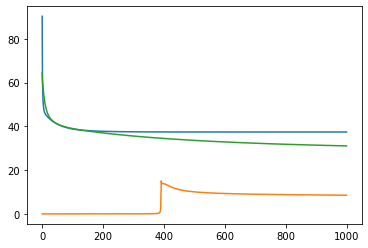

In [8]:
## i.
result = lr_se_linear(X_train, y_train, np.array([[1, 1, 1]]).T, 0.01)

print(result[0])
print(result[1])

plt.plot(result[2])


## ii.
result = lr_se_sigmoid(X_train, y_train, np.array([[1, 1, 1]]).T, 0.01)

print(result[0])
print(result[1])

plt.plot(result[2])


## iii.
result = lr_ce_sigmoid(X_train, y_train, np.array([[1, 1, 1]]).T, 0.01)

print(result[0])
print(result[1])

plt.plot(result[2])

### b) Random weight initializations experiments

Squared Error + Linear Activation
Experiment  0
[[-1.78470184]
 [ 0.38405481]
 [-0.02796226]]
1000



<ipython-input-21-9ce16ea49ef3>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


Experiment  1
[[-1.78470334]
 [ 0.3840549 ]
 [-0.02796199]]
1000



<ipython-input-21-9ce16ea49ef3>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-21-9ce16ea49ef3>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


Experiment  2
[[-1.78470034]
 [ 0.38405471]
 [-0.02796253]]
1000



<ipython-input-21-9ce16ea49ef3>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-21-9ce16ea49ef3>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


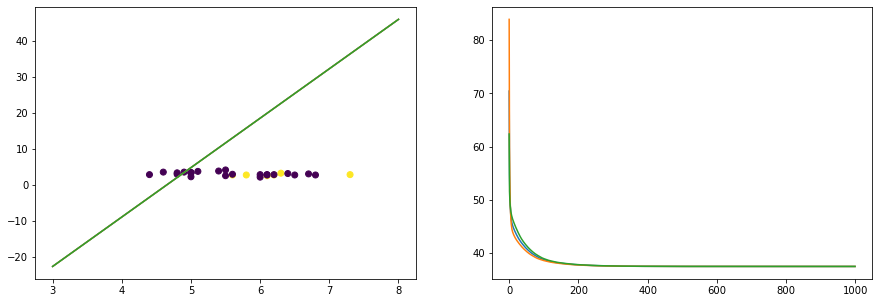

In [21]:
lr = 0.01

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)


## i.
print("Squared Error + Linear Activation")
for i in range(3):
    weights = np.random.rand(3,1)
    #print(weights)
    
    result = lr_se_linear(X_train, y_train, weights, lr, 1000)
    print("Experiment ", i)
    print(result[0])
    print(result[1])
    
    print("")
    plt.subplot(1, 2, 1)
    domain = np.linspace(3,8,100)
    line = -(result[0][0] * 1 + result[0][1] * domain) / result[0][2]

    plt.plot(domain,line)

    plt.subplot(1, 2, 2)
    plt.plot(result[2])
    plt.savefig('i.png')

Squared Error + Sigmoid Activation
Experiment  0
[[-4.20958014]
 [ 1.41015092]
 [-1.59070436]]
1000



<ipython-input-22-b11344e0138d>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


Experiment  1
[[-4.36120845]
 [ 1.42175904]
 [-1.564278  ]]
1000



<ipython-input-22-b11344e0138d>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-22-b11344e0138d>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


Experiment  2
[[-4.27045425]
 [ 1.41480657]
 [-1.58008747]]
1000



<ipython-input-22-b11344e0138d>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-22-b11344e0138d>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


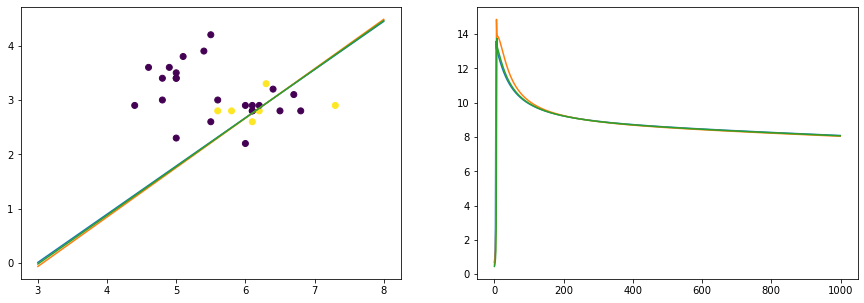

In [22]:
lr = 0.01

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)


## ii.
print("Squared Error + Sigmoid Activation")
for i in range(3):
    weights = np.random.rand(3,1)
    #print(weights)
    
    result = lr_se_sigmoid(X_train, y_train, weights, lr, 1000)
    print("Experiment ", i)
    print(result[0])
    print(result[1])
    
    print("")
    
    plt.subplot(1, 2, 1)
    domain = np.linspace(3,8,100)
    line = -(result[0][0] * 1 + result[0][1] * domain) / result[0][2]

    plt.plot(domain,line)

    plt.subplot(1, 2, 2)
    plt.plot(result[2])
    plt.savefig('ii.png')

Cross-Entropy Error + Sigmoid Activation
Experiment  0
[[-11.18743949]
 [  2.3451263 ]
 [ -1.3571376 ]]
1000



<ipython-input-23-329e7dc3411f>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


Experiment  1
[[-11.20879717]
 [  2.34736699]
 [ -1.35468568]]
1000



<ipython-input-23-329e7dc3411f>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-23-329e7dc3411f>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


Experiment  2
[[-11.11391198]
 [  2.33742292]
 [ -1.36559695]]
1000



<ipython-input-23-329e7dc3411f>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-23-329e7dc3411f>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


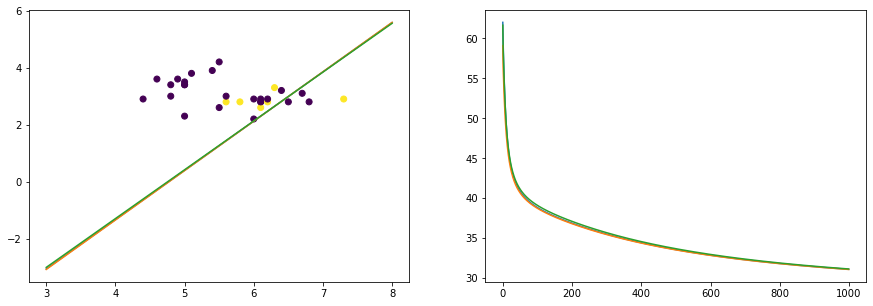

In [23]:
lr = 0.01

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)


## iii.
print("Cross-Entropy Error + Sigmoid Activation")
for i in range(3):
    weights = np.random.rand(3,1)
    #print(weights)
    
    result = lr_ce_sigmoid(X_train, y_train, weights, lr, 1000)
    print("Experiment ", i)
    print(result[0])
    print(result[1])
    
    print("")
    
    plt.subplot(1, 2, 1)
    domain = np.linspace(3,8,100)
    line = -(result[0][0] * 1 + result[0][1] * domain) / result[0][2]

    plt.plot(domain,line)

    plt.subplot(1, 2, 2)
    plt.plot(result[2])
    plt.savefig('iii.png')

### c) Which model converges faster?

By looking at the error function line charts, we can easily assess the convergence of each model. Right away we notice that Squared Errors + Linear Activation seems to converge the fastest, suggested by the straight line. However, this is not necessarily a good thing, as the model is still yielding an error of about 35. This is far from optimal.

On the other hand, the third model (Cross-Entropy + Sigmoid) seems to have not converge yet, as the slope is far from neutral. This model still has some potential but does not suggest that its performance should increase much more.

Lastly, the second model (Squared Error + Sigmoid) seems to be the one that yields the best results: despite the initial spike, the model seems to converge with an error of less than 10, which, compared with its peers, is easily the best.

<br>
<br>

### d)

In [12]:
def accuracy(real, prediction):
    #Accuracy = (TP+TN) / (TP+TN+FP+FN) ; Alternatively: #Equal values / #Size of arrays
    return np.sum(real == prediction) / len(real)

In [17]:
lr = 0.01

## i.
print("Squared Error + Linear Activation")
weights =  np.array([[1, 1, 1]]).T
    
weights = lr_se_linear(X_train, y_train, weights, lr, 1000)[0]

train_predict = []
for i in range(len(X_train)):
    dp = np.insert(X_train[i], 0, 1, axis=0) # Data Point (add bias)  
    o = linear_activation(dp,weights)
    # Not sure if we can do this here, but it yields good acc (0.84 / 0.73)
    #o = 1.0 if o >= 0.5 else 0.0
    o = 1.0 if o >= 0.0 else 0.0
    
    train_predict.append(o)
                    
test_predict = []
for i in range(len(X_test)):
    dp = np.insert(X_test[i], 0, 1, axis=0) # Data Point (add bias)        
    o = linear_activation(dp,weights)
    o = 1.0 if o >= 0.0 else 0.0
    
    test_predict.append(o)
                    

print("Train Accuracy:",accuracy(y_train, train_predict))
print("Test Accuracy:",accuracy(y_test, test_predict))

Squared Error + Linear Activation
Train Accuracy: 0.4666666666666667
Test Accuracy: 0.36666666666666664


In [14]:
lr = 0.01

## ii.
print("Squared Error + Sigmoid Activation")
weights =  np.array([[1, 1, 1]]).T
    
weights = lr_se_sigmoid(X_train, y_train, weights, lr, 1000)[0]

train_predict = []
for i in range(len(X_train)):
    dp = np.insert(X_train[i], 0, 1, axis=0) # Data Point (add bias)
    o = sigmoid_activation(dp,weights)
    o = 1.0 if o >= 0.5 else 0.0
    
    train_predict.append(o)
                    
test_predict = []
for i in range(len(X_test)):
    dp = np.insert(X_test[i], 0, 1, axis=0) # Data Point (add bias)        
    o = sigmoid_activation(dp,weights)
    o = 1.0 if o >= 0.5 else 0.0
    
    test_predict.append(o)
                    

print("Train Accuracy:",accuracy(y_train, train_predict))
print("Test Accuracy:",accuracy(y_test, test_predict))

Squared Error + Sigmoid Activation
Train Accuracy: 0.75
Test Accuracy: 0.7


In [15]:
lr = 0.01

## iii.
print("Cross-Entropy Error + Sigmoid Activation")
weights =  np.array([[1, 1, 1]]).T
    
weights = lr_ce_sigmoid(X_train, y_train, weights, lr, 1000)[0]

train_predict = []
for i in range(len(X_train)):
    dp = np.insert(X_train[i], 0, 1, axis=0) # Data Point (add bias)  
    o = sigmoid_activation(dp,weights)
    o = 1.0 if o >= 0.5 else 0.0
    
    train_predict.append(o)
                    
test_predict = []
for i in range(len(X_test)):
    dp = np.insert(X_test[i], 0, 1, axis=0) # Data Point (add bias)        
    o = sigmoid_activation(dp,weights)
    o = 1.0 if o >= 0.5 else 0.0
    
    test_predict.append(o)


print("Train Accuracy:",accuracy(y_train, train_predict))
print("Test Accuracy:",accuracy(y_test, test_predict))

Cross-Entropy Error + Sigmoid Activation
Train Accuracy: 0.7666666666666667
Test Accuracy: 0.7333333333333333


### e) Do you get the same results as Logistic Regression of Scikit-learn?

Although the developed model does not yield the exact same accuracy as the one used in Scikit-learn, the final values are nevertheless acceptable, both the train and test sets. It is worth highlighting that our test accuracy actually surpasses the one obtained using Sci-kit learn whilst having a lower training accuracy, suggesting our LogReg model is less prone to overfitting than the SK-Learn one.

As some final remarks, we would like to highlight that the Linear Regression yielded the worse results, as expected, considering we are facing a classification problem, and a linear activation function excels at regression.

Surprisingly enough, however, it seems that the model that yields the best results is the Logistic Regression (model 3), contrary to prior belief. This might be due to the fact that different error functions cannot be equally compared. We can objectively compare the first and second models since they are both using Squared Errors, but not model 2 and 3, since we would be comparing two values with different meanings.